# Entropy of Encrypted Data

Coniser a 4-bits XOR encryption scheme that encrypts a 4-bits plaintext $P$ into a 4-bits ciphertext $C$ using the following rule:

$$
C_i = P_i \oplus K_i
$$

where $K$ is a 4-bits key. The key $K$ is chosen from all possible 4-bits keys with equal probability.

In [1]:
def XOR4(p,k):
    c = []
    for i in range(4):
        c.append(p[i]^k[i])
    return c

p = [[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],
     [0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
     [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],
     [1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]
k = [[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],
     [0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
     [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],
     [1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]
c = []
for i in range(16):
    ci = []
    for j in range(16):
        ci.append(XOR4(p[i],k[j]))
    c.append(ci)

By turning binary to decimal, we can represent the result as heatmap.

In [2]:
import matplotlib.pyplot as plt

In [3]:
def b2d(b):
    d = 0
    for i in range(4):
        d += b[i]*2**(3-i)
    return d

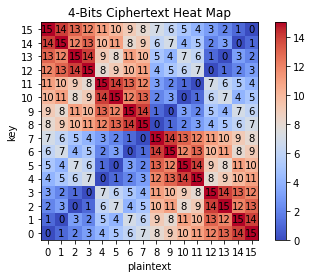

In [4]:
z = []
for i in range(16):
    zi = []
    for j in range(16):
        zi.append(b2d(c[i][j]))
    z.append(zi)

fig, ax = plt.subplots()
im = ax.imshow(z, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(i, j, z[i][j], ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)
ax.set_title('4-Bits Ciphertext Heat Map')
plt.show()

And we can construct a bigger heatmap with 10-bits XOR encryption scheme to see the the result.

Note: to make it more efficient, we use numba to accelerate the calculation.

In [5]:
from numba import njit, prange

In [6]:
@njit
def xorCipher_kernel(n):
    c = []
    for i in prange(n):
        ci = []
        for j in prange(n):
            ci.append(i^j)
        c.append(ci)
    return c

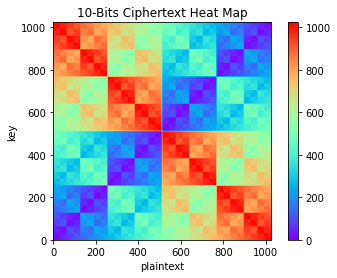

In [7]:
cn = xorCipher_kernel(1024)

fig, ax = plt.subplots()
im = ax.imshow(cn, origin='lower', cmap='rainbow')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)
ax.set_title('10-Bits Ciphertext Heat Map')
plt.show()

We can see that it presents a fractal pattern which is so-called [Bitwise Fractals](https://icefractal.com/articles/bitwise-fractals/).

Back to the 4-bits case, we can calculate the information properties of the plaintexts, keys and ciphertexts.

### Entropy

In [8]:
from src.entropy import entropy

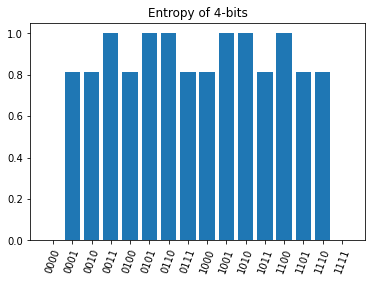

In [9]:
entropy_0 = []
for i in range(16):
    entropy_0.append(entropy(p[i]))

fig, ax = plt.subplots()

ax.bar(range(16),entropy_0)
ax.set_xticks(range(16))
ax.set_xticklabels(['0000','0001','0010','0011',
                    '0100','0101','0110','0111',
                    '1000','1001','1010','1011',
                    '1100','1101','1110','1111'],
                   rotation=70)
ax.set_title('Entropy of 4-bits')
plt.show()

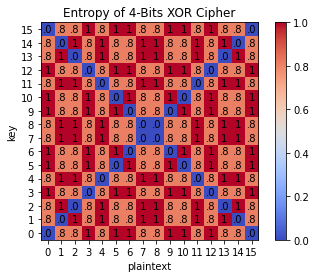

In [10]:
entropy_cipher = []
for i in range(16):
    ei = []
    for j in range(16):
        ei.append(entropy(c[i][j]))
    entropy_cipher.append(ei)
    
fig, ax = plt.subplots()
im = ax.imshow(entropy_cipher, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(j, i, f'{"."+f"{entropy_cipher[i][j]*10:.0f}" if entropy_cipher[i][j]<1 else 1}', ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title('Entropy of 4-Bits XOR Cipher')
plt.show()

We can see that the map has become four-fold symmetric.

And still we can see 10-bits case.

In [11]:
entropy_cipher_n = []
for i in range(1024):
    ei = []
    for j in range(1024):
        ei.append(entropy(cn[i][j]))
    entropy_cipher_n.append(ei)


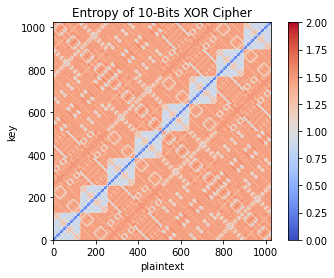

In [12]:
fig, ax = plt.subplots()
im = ax.imshow(entropy_cipher_n, origin='lower', cmap='coolwarm')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)
ax.set_title('Entropy of 10-Bits XOR Cipher')
plt.show()

### Mutual Information

1. $I(C;P)$

In [13]:
from src.mutual_info import mutual_info

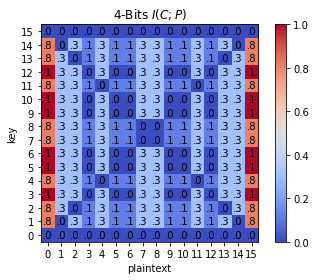

In [14]:
mi_cp = []
for i in range(16):
    mii = []
    for j in range(16):
        mii.append(mutual_info(c[i][j], p[i]))
    mi_cp.append(mii)
    
fig, ax = plt.subplots()
im = ax.imshow(mi_cp, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(j, i, f'{"."+f"{mi_cp[i][j]*10:.0f}" if mi_cp[i][j]<1 else 1}', ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'4-Bits $I(C;P)$')
plt.show()

And we can see the 7-bits case. (10 bits will take too long to calculate)

In [15]:
c128 = xorCipher_kernel(128)

mi_cp_n = []
for i in range(128):
    mii = []
    for j in range(128):
        mii.append(mutual_info('{:07b}'.format(c128[i][j]), '{:07b}'.format(i)))
    mi_cp_n.append(mii)

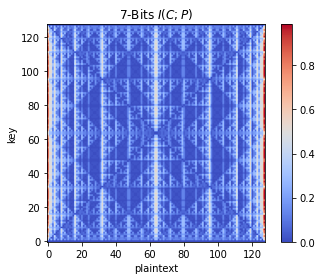

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(mi_cp_n, origin='lower', cmap='coolwarm')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)
ax.set_title(r'7-Bits $I(C;P)$')
plt.show()

Again! We see the fractal pattern in large scale.

2. $I(C;K)$

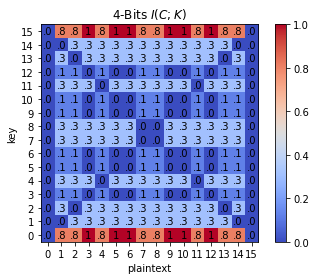

In [17]:
mi_ck = []
for i in range(16):
    mii = []
    for j in range(16):
        mii.append(mutual_info(c[i][j], k[j]))
    mi_ck.append(mii)
    
fig, ax = plt.subplots()
im = ax.imshow(mi_ck, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(j, i, f'{"."+f"{mi_ck[i][j]*10:.0f}" if mi_ck[i][j]<1 else 1}', ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'4-Bits $I(C;K)$')
plt.show()

In [18]:
mi_ck_n = []
for i in range(128):
    mii = []
    for j in range(128):
        mii.append(mutual_info('{:07b}'.format(c128[i][j]), '{:07b}'.format(j)))
    mi_ck_n.append(mii)

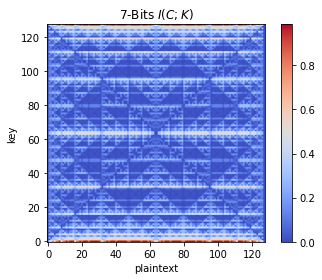

In [19]:
fig, ax = plt.subplots()
im = ax.imshow(mi_ck_n, origin='lower', cmap='coolwarm')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)
ax.set_title(r'7-Bits $I(C;K)$')
plt.show()

We can see that it just a quarter turn of the map of $I(C;K)$

### Conditional Entropy

By the relation of mutual information and conditional entropy, we can find that: 

$$
H(C|P) = H(C) - I(C;P)\\
H(C|K) = H(C) - I(C;K)\\
H(P|C) = H(P) - I(C;P)\\
H(K|C) = H(K) - I(C;K)
$$

1. $H(C|P)$

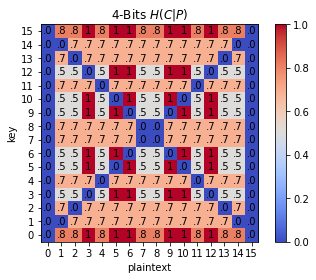

In [20]:
h_cp = []
for i in range(16):
    hi = []
    for j in range(16):
        hi.append(entropy_cipher[i][j]-mi_cp[i][j])
    h_cp.append(hi)

fig, ax = plt.subplots()
im = ax.imshow(h_cp, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(j, i, f'{"."+f"{h_cp[i][j]*10:.0f}" if h_cp[i][j]<1 else 1}', ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'4-Bits $H(C|P)$')
plt.show()

In [21]:
entropy_cipher_n = []
for i in range(128):
    ei = []
    for j in range(128):
        ei.append(entropy(c128[i][j]))
    entropy_cipher_n.append(ei)

In [22]:
h_cp_n = []
for i in range(128):
    h_cp_i = []
    for j in range(128):
        h_cp_i.append(entropy_cipher_n[i][j]-mi_cp_n[i][j])
    h_cp_n.append(h_cp_i)

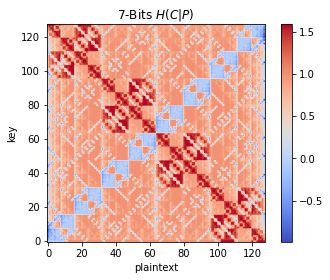

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(h_cp_n, origin='lower', cmap='coolwarm')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'7-Bits $H(C|P)$')
plt.show()

2. $H(C|K)$

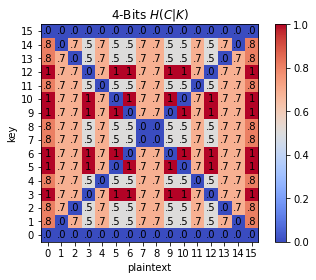

In [24]:
h_ck = []
for i in range(16):
    hi = []
    for j in range(16):
        hi.append(entropy_cipher[i][j]-mi_ck[i][j])
    h_ck.append(hi)
    
fig, ax = plt.subplots()
im = ax.imshow(h_ck, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(j, i, f'{"."+f"{h_ck[i][j]*10:.0f}" if h_ck[i][j]<1 else 1}', ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'4-Bits $H(C|K)$')
plt.show()

In [25]:
h_ck_n = []
for i in range(128):
    h_ck_i = []
    for j in range(128):
        h_ck_i.append(entropy_cipher_n[i][j]-mi_ck_n[i][j])
    h_ck_n.append(h_ck_i)

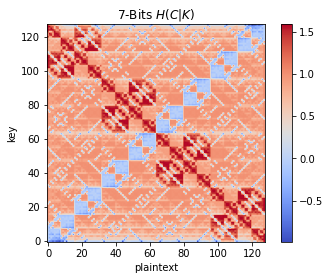

In [26]:
fig, ax = plt.subplots()
im = ax.imshow(h_ck_n, origin='lower', cmap='coolwarm')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'7-Bits $H(C|K)$')
plt.show()

3. $H(P|C)$

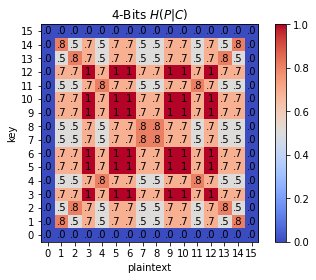

In [27]:
h_pc = []
for i in range(16):
    h_pc_i = []
    for j in range(16):
        h_pc_i.append(entropy_0[i]-mi_cp[i][j])
    h_pc.append(h_pc_i)

    
fig, ax = plt.subplots()
im = ax.imshow(h_pc, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(j, i, f'{"."+f"{h_pc[i][j]*10:.0f}" if h_pc[i][j]<1 else 1}', ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'4-Bits $H(P|C)$')
plt.show()

In [28]:
h_pc_n = []
for i in range(128):
    h_pc_i = []
    for j in range(128):
        h_pc_i.append(entropy('{:07b}'.format(i))-mi_cp_n[i][j])
    h_pc_n.append(h_pc_i)

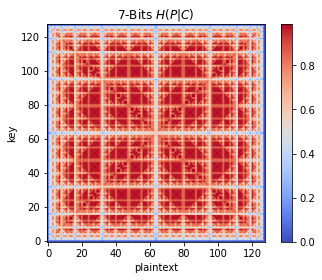

In [29]:
fig, ax = plt.subplots()
im = ax.imshow(h_pc_n, origin='lower', cmap='coolwarm')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'7-Bits $H(P|C)$')
plt.show()

4. $H(K|C)$

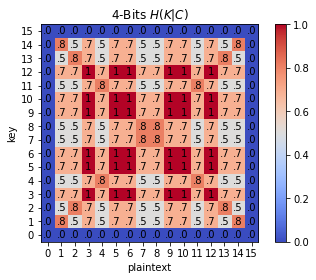

In [30]:
h_kc = []
for i in range(16):
    h_kc_i = []
    for j in range(16):
        h_kc_i.append(entropy_0[j]-mi_ck[i][j])
    h_kc.append(h_kc_i)

    
fig, ax = plt.subplots()
im = ax.imshow(h_kc, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(j, i, f'{"."+f"{h_kc[i][j]*10:.0f}" if h_kc[i][j]<1 else 1}', ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'4-Bits $H(K|C)$')
plt.show()

In [31]:
h_kc_n = []
for i in range(128):
    h_kc_i = []
    for j in range(128):
        h_kc_i.append(entropy('{:07b}'.format(j))-mi_ck_n[i][j])
    h_kc_n.append(h_kc_i)

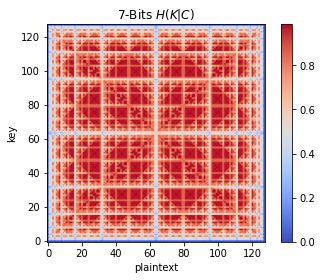

In [32]:
fig, ax = plt.subplots()
im = ax.imshow(h_kc_n, origin='lower', cmap='coolwarm')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title(r'7-Bits $H(K|C)$')
plt.show()